# Introduction
This notebook explores the Financial Transactions Dataset to identify fraudulent activities and understand underlying behavioral patterns

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('../../dataset/financial_fraud_detection_dataset.csv')

In [3]:
dataframe.head()

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22T09:22:43.516168,ACC877572,ACC388389,343.78,withdrawal,utilities,Tokyo,mobile,False,NaN,NaN,-0.21,3,0.22,card,13.101.214.112,D8536477
1,T100001,2023-08-04T01:58:02.606711,ACC895667,ACC944962,419.65,withdrawal,online,Toronto,atm,False,NaN,NaN,-0.14,7,0.96,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12T11:39:33.742963,ACC733052,ACC377370,2773.86,deposit,other,London,pos,False,NaN,NaN,-1.78,20,0.89,card,185.98.35.23,D4823498
3,T100003,2023-10-10T06:04:43.195112,ACC996865,ACC344098,1666.22,deposit,online,Sydney,pos,False,NaN,NaN,-0.60,6,0.37,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24T08:09:02.700162,ACC584714,ACC497887,24.43,transfer,utilities,Toronto,mobile,False,NaN,NaN,0.79,13,0.27,ACH,108.161.108.255,D7637601


In [4]:
dataframe.dtypes

transaction_id                  object
timestamp                       object
sender_account                  object
receiver_account                object
amount                         float64
transaction_type                object
merchant_category               object
location                        object
device_used                     object
is_fraud                          bool
fraud_type                      object
time_since_last_transaction    float64
spending_deviation_score       float64
velocity_score                   int64
geo_anomaly_score              float64
payment_channel                 object
ip_address                      object
device_hash                     object
dtype: object

In [5]:
categoric_columns = dataframe.select_dtypes(include=['object']).columns.to_list()
for column in categoric_columns:
    uniques = dataframe[column].unique()
    print(f'{column}: {len(uniques)} unique values')

transaction_id: 5000000 unique values
timestamp: 4999998 unique values
sender_account: 896513 unique values
receiver_account: 896639 unique values
transaction_type: 4 unique values
merchant_category: 8 unique values
location: 8 unique values
device_used: 4 unique values
fraud_type: 2 unique values
payment_channel: 4 unique values
ip_address: 4997068 unique values
device_hash: 3835723 unique values


In [6]:
dataframe = dataframe.drop(columns=['transaction_id'])

## Exploratory Data Analysis

## Null Handling

In [7]:
summary_null = pd.DataFrame({
    'Coluna': dataframe.columns,
    'Quantidade': dataframe.isnull().sum(axis=0).values,
    'Porcentagem': (dataframe.isnull().mean() * 100).round(2).values
})
summary_null

,Coluna,Quantidade,Porcentagem
0,timestamp,0,0.00
1,sender_account,0,0.00
2,receiver_account,0,0.00
3,amount,0,0.00
4,transaction_type,0,0.00
5,merchant_category,0,0.00
6,location,0,0.00
7,device_used,0,0.00
8,is_fraud,0,0.00
9,fraud_type,4820447,96.41


In [8]:
# Alta porcentagem de nulos em fraud_type porque fraudes são a minoria. Fazer um dataframe simples para tornar isso visual.

dataframe[(dataframe['is_fraud'] == False) & (dataframe['fraud_type'].isnull() == False)]

# Logo, so existe um fraud_type para uma is_fraud = True

dataframe['fraud_type'] = dataframe['fraud_type'].fillna('no_fraud')


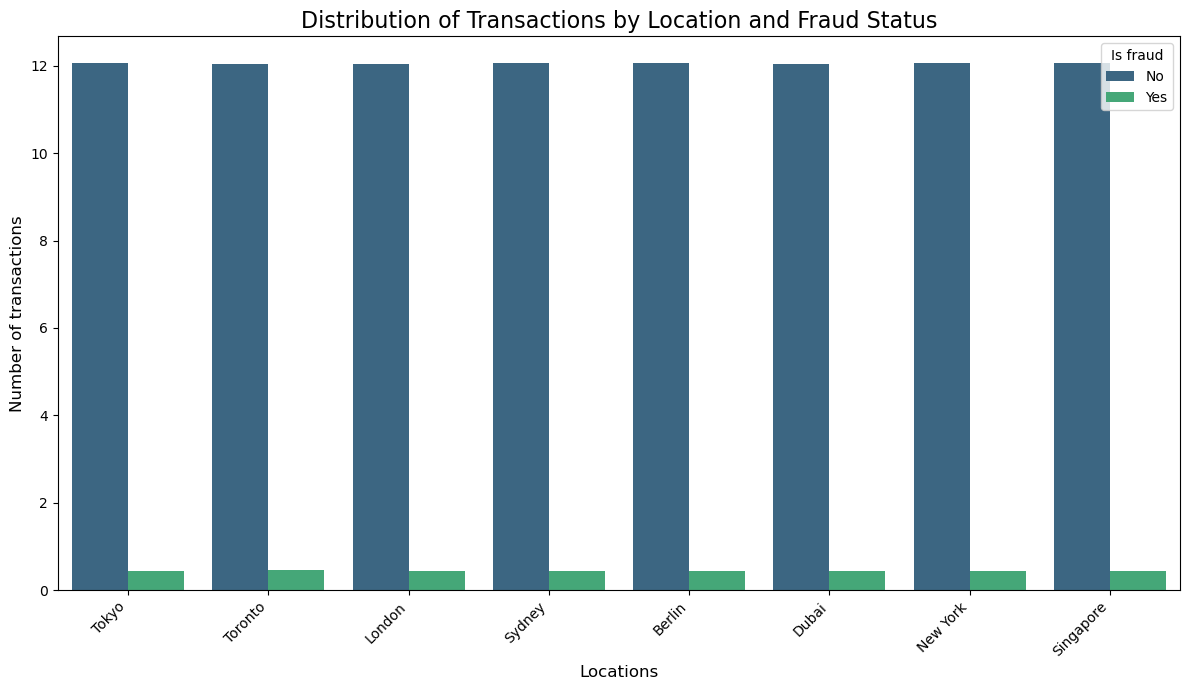

In [9]:
# Plotting the distribution of transactions by location, differentiated by fraud status
plt.figure(figsize=(12, 7))
sns.countplot(data=dataframe, x='location', hue='is_fraud', palette='viridis', stat='percent')
plt.title('Distribution of Transactions by Location and Fraud Status', fontsize=16)
plt.xlabel('Locations', fontsize=12)
plt.ylabel('Number of transactions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is fraud', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

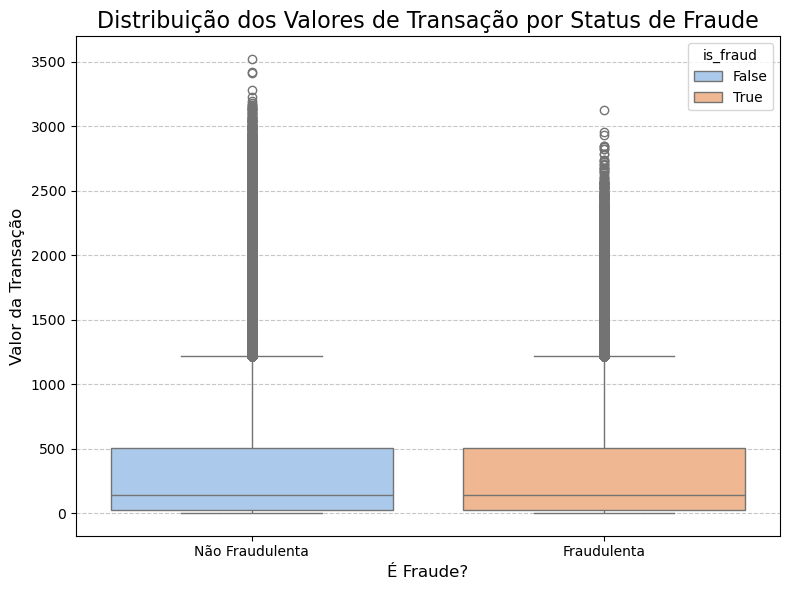

In [10]:
# Criar o box plot para analisar 'amount' em relação a 'is_fraud'
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataframe, x='is_fraud', y='amount', hue='is_fraud', palette='pastel')
plt.title('Distribuição dos Valores de Transação por Status de Fraude', fontsize=16)
plt.xlabel('É Fraude?', fontsize=12)
plt.ylabel('Valor da Transação', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Não Fraudulenta', 'Fraudulenta'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

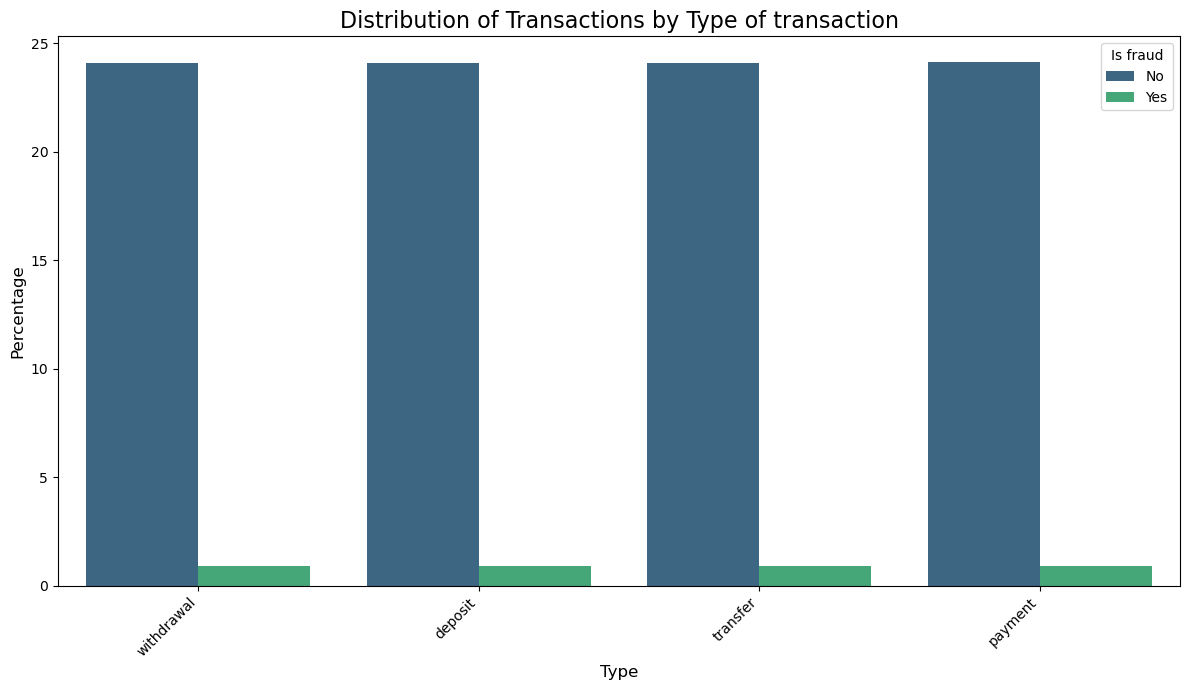

In [11]:
# Plotting the distribution of transactions by transaction type, differentiated by fraud status
plt.figure(figsize=(12, 7))
sns.countplot(data=dataframe, x='transaction_type', hue='is_fraud', palette='viridis', stat='percent')
plt.title('Distribution of Transactions by Type of transaction', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is fraud', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

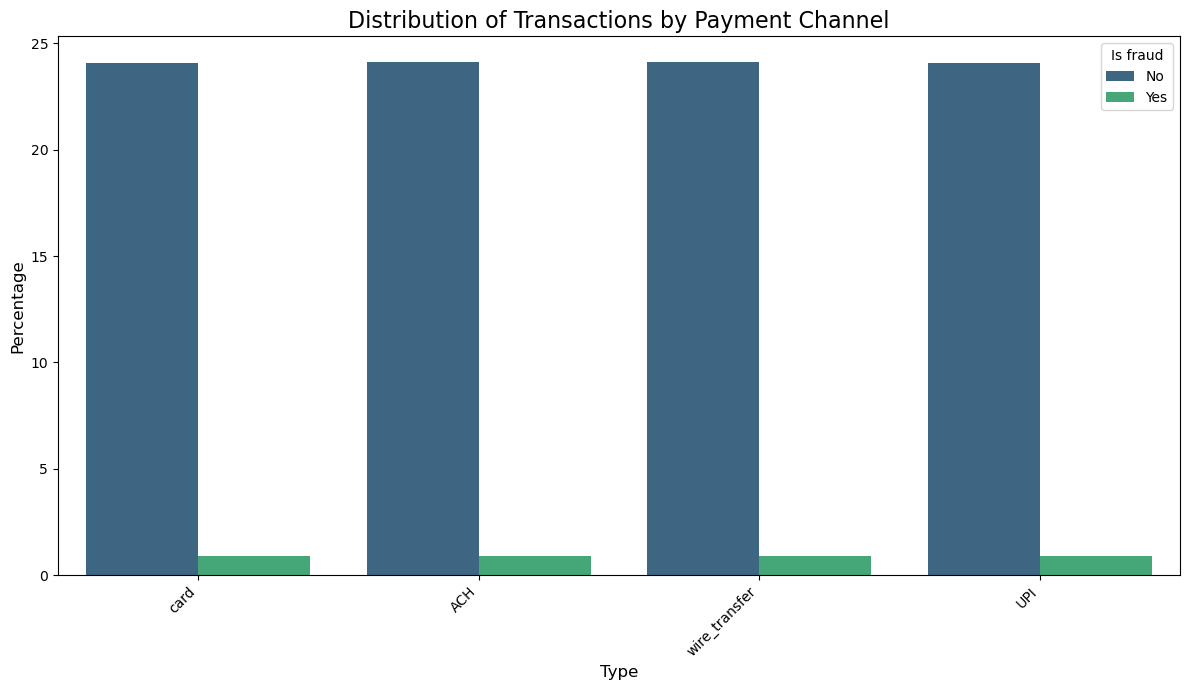

In [12]:
# Plotting the distribution of transactions by payment channel, differentiated by fraud status
plt.figure(figsize=(12, 7))
sns.countplot(data=dataframe, x='payment_channel', hue='is_fraud', palette='viridis', stat='percent')
plt.title('Distribution of Transactions by Payment Channel', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is fraud', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

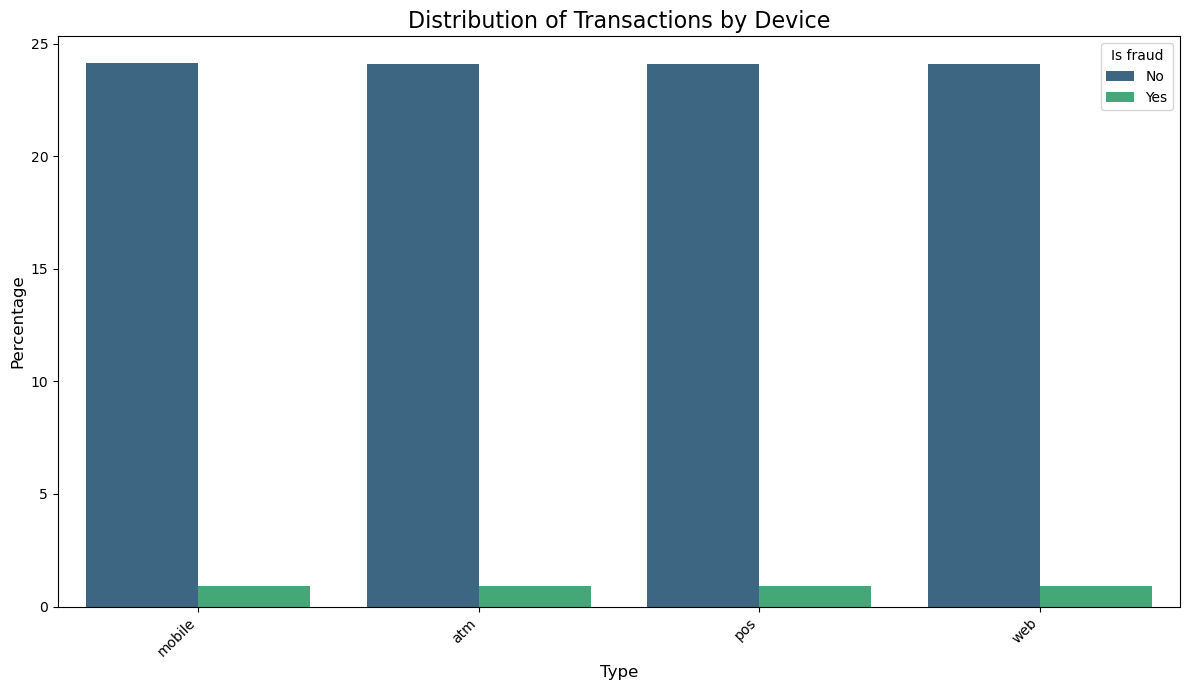

In [13]:
# Plotting the distribution of transactions by payment channel, differentiated by fraud status
plt.figure(figsize=(12, 7))
sns.countplot(data=dataframe, x='device_used', hue='is_fraud', palette='viridis', stat='percent')
plt.title('Distribution of Transactions by Device', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is fraud', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

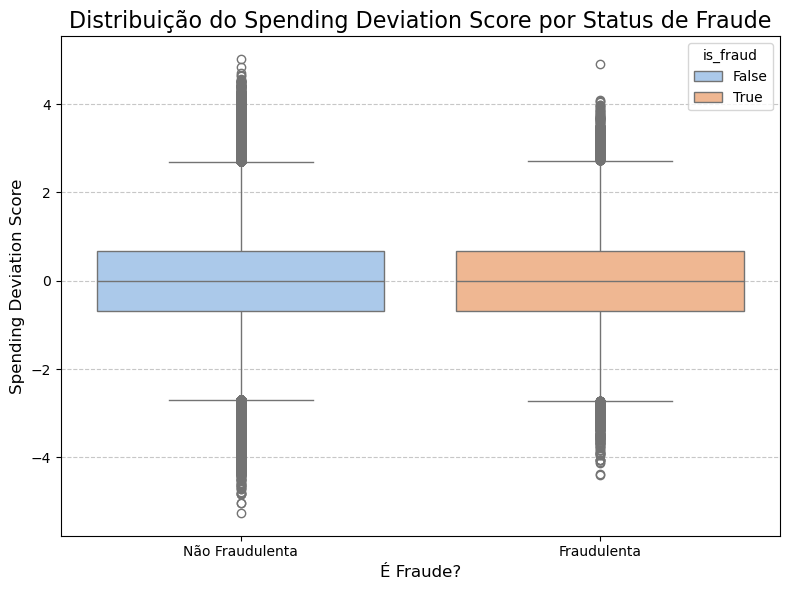

In [14]:
# Criar o box plot para analisar 'spending_deviation_score' em relação a 'is_fraud'
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataframe, x='is_fraud', hue = 'is_fraud', y='spending_deviation_score', palette='pastel')
plt.title('Distribuição do Spending Deviation Score por Status de Fraude', fontsize=16)
plt.xlabel('É Fraude?', fontsize=12)
plt.ylabel('Spending Deviation Score', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Não Fraudulenta', 'Fraudulenta'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

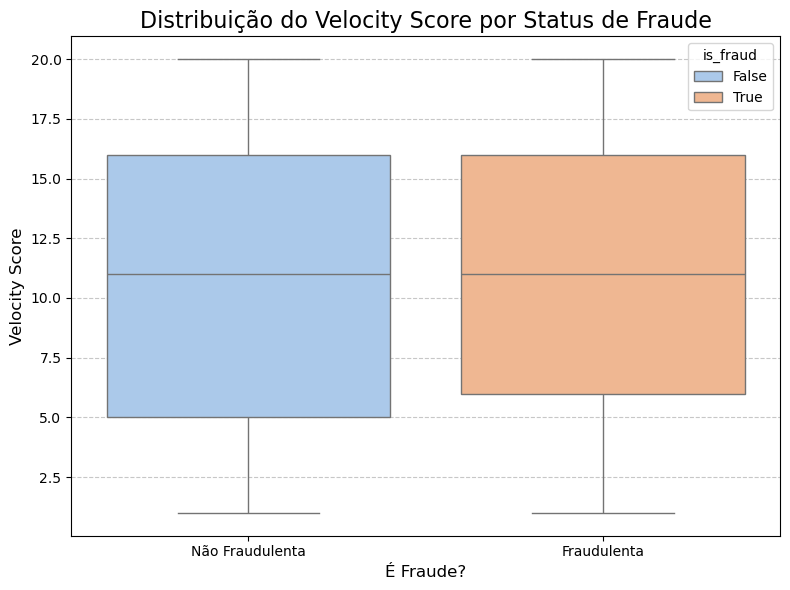

: 

In [ ]:
# Criar o box plot para analisar 'velocity_score' em relação a 'is_fraud'
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataframe, x='is_fraud', y='velocity_score',hue='is_fraud', palette='pastel')
plt.title('Distribuição do Velocity Score por Status de Fraude', fontsize=16)
plt.xlabel('É Fraude?', fontsize=12)
plt.ylabel('Velocity Score', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Não Fraudulenta', 'Fraudulenta'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataframe, x='is_fraud', y='geo_anomaly_score',hue='is_fraud', palette='pastel')
plt.title('Distribuição do Geo Anomaly Score por Status de Fraude', fontsize=16)
plt.xlabel('É Fraude?', fontsize=12)
plt.ylabel('Geo Anomaly Score', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Não Fraudulenta', 'Fraudulenta'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [4]:
dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'], format='ISO8601')

# Extrair o dia da semana
dataframe['day_of_week'] = dataframe['timestamp'].dt.dayofweek

# Extrair a hora
dataframe['hour'] = dataframe['timestamp'].dt.hour

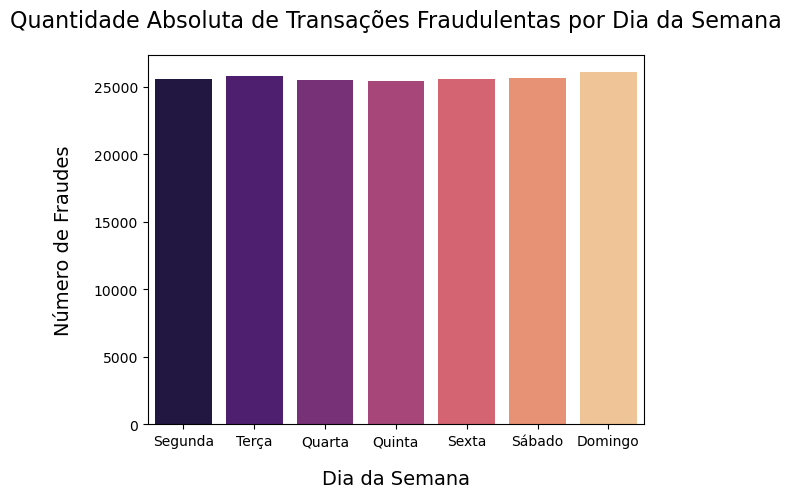

In [ ]:



# Mapear os números dos dias da semana para nomes para melhor visualização
day_names = ["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"]
dataframe['day_of_week_name'] = dataframe['day_of_week'].map(lambda x: day_names[x])

fraud_counts = dataframe.groupby('day_of_week_name')['is_fraud'].sum()

# Ordenar os resultados pela ordem cronológica dos dias

fraud_counts = fraud_counts.reindex(day_names)

sns.barplot(x=fraud_counts.index, y=fraud_counts.values, hue= fraud_counts.index,palette='magma',legend=False)

# Personalização
plt.title('Quantidade Absoluta de Transações Fraudulentas por Dia da Semana', fontsize=16, pad=20)
plt.xlabel('Dia da Semana', fontsize=14, labelpad=15)
plt.ylabel('Número de Fraudes', fontsize=14, labelpad=15)
plt.show()

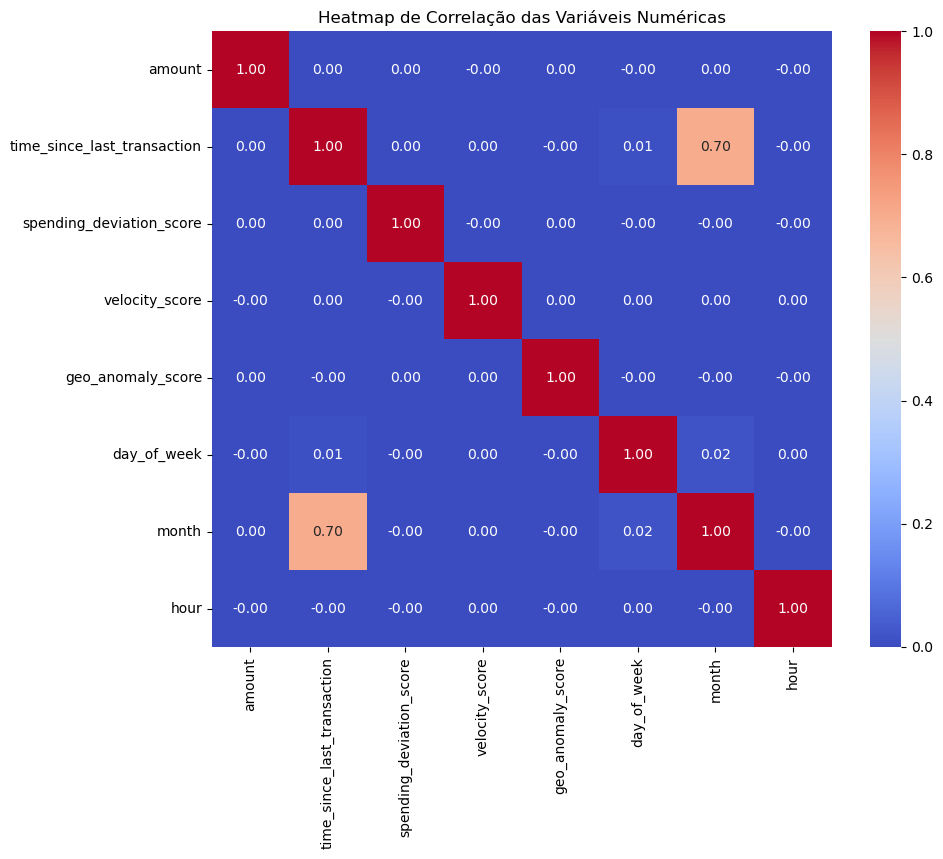

In [ ]:
numeric_cols = dataframe.select_dtypes(include=np.number).columns
correlation_matrix = dataframe[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlação das Variáveis Numéricas')
plt.show()

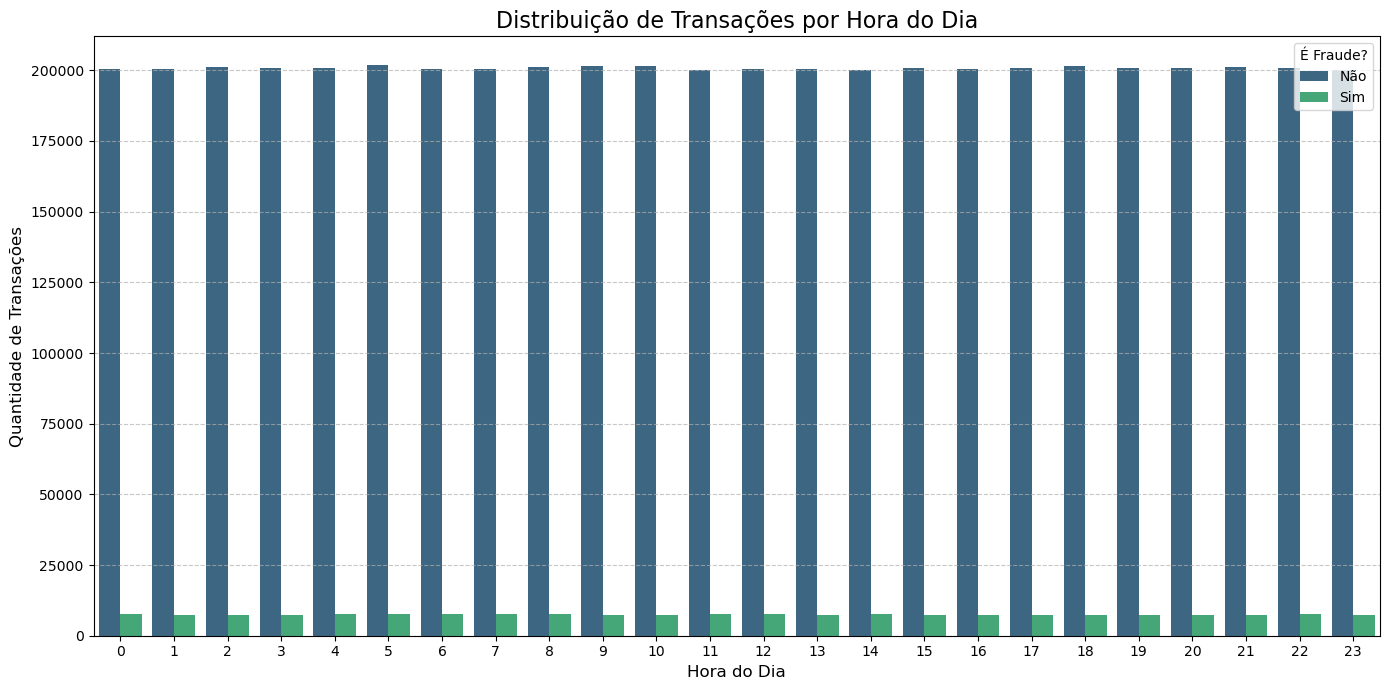

In [5]:

plt.figure(figsize=(14, 7))
sns.countplot(data=dataframe, x='hour', hue='is_fraud', palette='viridis')

plt.title('Distribuição de Transações por Hora do Dia', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Quantidade de Transações', fontsize=12)
plt.legend(title='É Fraude?', labels=['Não', 'Sim'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

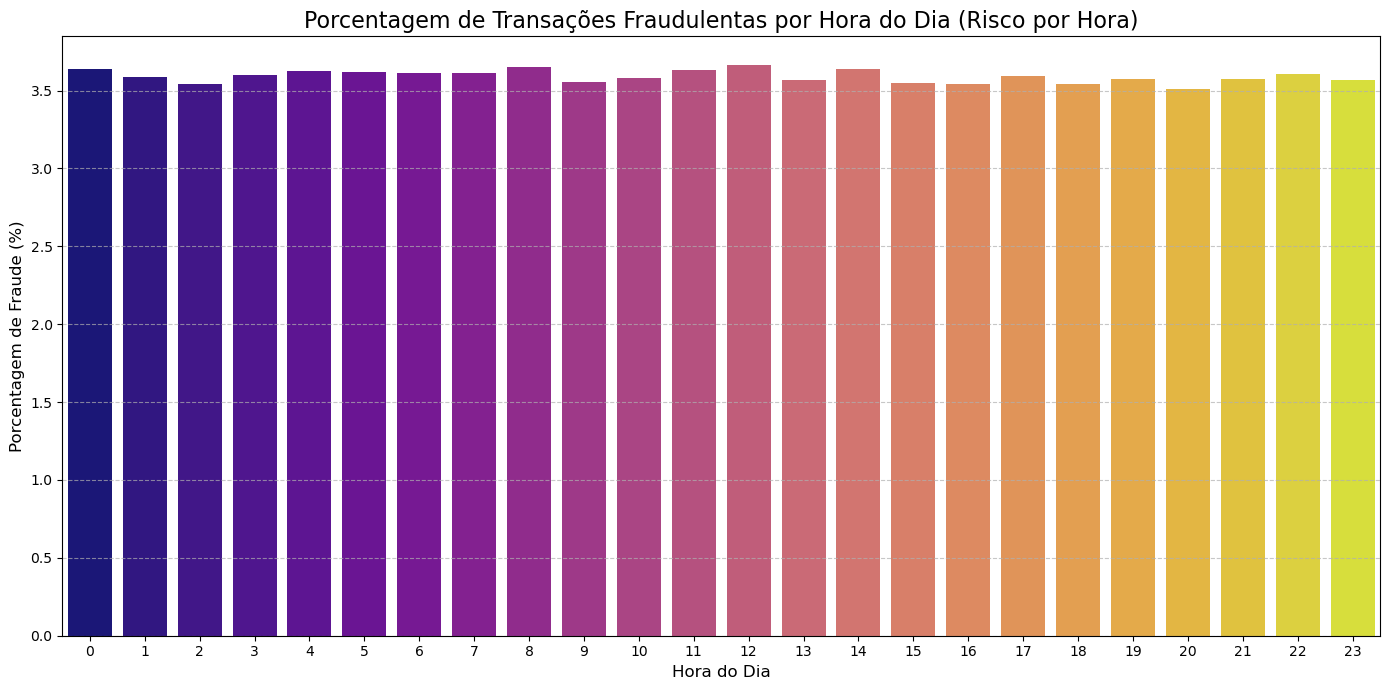

In [11]:
# Agrupar por hora e calcular a porcentagem de fraude
hourly_fraud_percentage = dataframe.groupby('hour')['is_fraud'].mean() * 100
hourly_fraud_percentage = hourly_fraud_percentage.reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=hourly_fraud_percentage, x='hour', y='is_fraud', hue='hour',palette='plasma',legend=False)

plt.title('Porcentagem de Transações Fraudulentas por Hora do Dia (Risco por Hora)', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Porcentagem de Fraude (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()